<a href="https://colab.research.google.com/github/Alirs2002/fake_and_real_news/blob/main/fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [94]:
import zipfile
zipfile = zipfile.ZipFile("archive_5.zip")

In [95]:
zipfile.extractall()

In [96]:
!ls

archive_5.zip  Fake.csv  sample_data  True.csv


In [97]:
real_news = pd.read_csv("True.csv")
fake_news = pd.read_csv("Fake.csv")

In [98]:
real_news.info(),fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


(None, None)

now i think it is better to label the dataset

In [99]:
fake_news["label"] = 0
real_news["label"] = 1

now lets explore the datasert

In [100]:
fake_news.head(4)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0


In [101]:
real_news.iloc[1]["text"]

'WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District Court in the meantime,” the official said, speaking on condition 

In [102]:
real_news.head(5)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [103]:
real_news.subject.value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [104]:
fake_news.subject.value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [105]:
real_news.date.value_counts()

date
December 20, 2017      182
December 6, 2017       166
November 30, 2017      162
November 9, 2017       158
October 13, 2017       155
                      ... 
August 6, 2016           1
August 21, 2016          1
September 3, 2016        1
September 11, 2016       1
January 24, 2016         1
Name: count, Length: 716, dtype: int64

i think, in my opinion, it is not essential to have date and title and the subject in our dataset
so i am going to drop them

In [106]:
real_news.drop(columns=["date","title","subject"],axis = 1,inplace=True)

In [107]:
fake_news.drop(columns=["date","title","subject"],axis = 1,inplace=True)

In [108]:
real_news.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


now lets concat the real and fake news

In [109]:
data_set = pd.concat([real_news,fake_news],ignore_index=True)
dataset = data_set.sample(frac=1,ignore_index=True)

In [110]:
dataset.head(),dataset.tail(8)

(                                                text  label
 0  Any sane person would think that after Donald ...      0
 1  UNITED NATIONS (Reuters) - United Nations Secr...      1
 2  CAIRO (Reuters) - Saudi Arabia and other Arab ...      1
 3  CAIRO (Reuters) - The former leader of Egypt s...      1
 4                                                         0,
                                                     text  label
 44890  Donald Trump gave a speech to the NRA, who the...      0
 44891  HONG KONG (Reuters) - Former British banker Ru...      1
 44892  B b but Baron Trump wore a t-shirt that said  ...      0
 44893  While in Virginia, GOP presidential nominee Do...      0
 44894  Teen Vogue writer, Lauren Duca, humiliated Tuc...      0
 44895  NEW DELHI (Reuters) - A Hindu man in India tri...      1
 44896  Donald Trump just threw a match on this tinder...      0
 44897   Our vision of the world ? Where are the Catho...      0)

In [111]:
dataset.shape

(44898, 2)

In [112]:
from sklearn.model_selection import train_test_split

train_data , test_data = train_test_split(dataset,test_size=0.1)

In [113]:
test_data.shape,train_data.shape

((4490, 2), (40408, 2))

In [114]:
x_train = train_data.drop(columns=["label"])
x_test = test_data.drop(columns=["label"])

y_train = train_data["label"]
y_test = test_data["label"]

In [115]:
x_train

,text
34213,ATHENS (Reuters) - Self-proclaimed anarchists ...
32177,UNITED NATIONS (Reuters) - French President Em...
35964,The only way that Trump can talk about immigra...
3253,"Iran, where the thought police will always hav..."
30702,Just another day in the holy month of Ramadan ...
...,...
35136,WASHINGTON (Reuters) - U.S. spy agencies have ...
35144,If Donald Trump doesn t want to be booed or la...
22076,A routine church service at the St. Peter s Mi...
10534,Just when you think the GOP can t sink any low...


In [116]:
x_train.shape

(40408, 1)

In [117]:
len_list = x_train["text"].str.split().str.len()

In [118]:
np.mean(len_list)

405.1739259552564

In [119]:
np.max(len_list)

8135

In [120]:
np.percentile(len_list,95)

904.0

So,95 percent of news are shorter than 905 tokens
so we should consider this size for our vectorization and embedding layers

In [121]:

from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

x_train_tensor = tf.convert_to_tensor(x_train)
y_train_tensor = tf.convert_to_tensor(y_train_encoded)

x_test_tensor = tf.convert_to_tensor(x_test)
y_test_tensor = tf.convert_to_tensor(y_test_encoded)


train_data = tf.data.Dataset.from_tensor_slices((x_train_tensor,y_train_tensor))
test_data = tf.data.Dataset.from_tensor_slices((x_test_tensor,y_test_tensor))

now lets create our vectorizer for our model

In [122]:
max_tokens = 150000
vectorizer = tf.keras.layers.TextVectorization(max_tokens,
                                               standardize='lower_and_strip_punctuation',
                                               split='whitespace',
                                               output_mode='int',
                                               output_sequence_length=900)

In [123]:
vectorizer.adapt(x_train.values)

In [124]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'a',
 'and',
 'in',
 'that',
 'on',
 's',
 'for',
 'is',
 'he',
 'said',
 'it',
 'with',
 'trump',
 'was',
 'as',
 'his',
 'by',
 'has',
 'be',
 'have',
 'not',
 'from',
 'this',
 'at',
 'are',
 'who',
 'an',
 'they',
 'us',
 'but',
 'would',
 'we',
 'i',
 'president',
 'about',
 'will',
 'their',
 'had',
 'you',
 't',
 'been',
 'were',
 'people',
 'or',
 'more',
 'which',
 'she',
 'after',
 'her',
 'one',
 'if',
 'out',
 'all',
 'what',
 'when',
 'its',
 'state',
 'also',
 'new',
 'up',
 'there',
 'reuters',
 'no',
 'over',
 'donald',
 'our',
 'house',
 'government',
 'can',
 'states',
 'clinton',
 'obama',
 'than',
 'so',
 'other',
 'just',
 'him',
 'republican',
 'some',
 'could',
 'united',
 'told',
 'into',
 'white',
 'against',
 'like',
 'do',
 'because',
 'them',
 'campaign',
 'any',
 'last',
 'news',
 'two',
 'election',
 'time',
 'now',
 'only',
 'how',
 'party',
 'first',
 'former',
 'washington',
 'even',
 'should',
 'being',
 'year',
 '

In [125]:
len(vectorizer.get_vocabulary())

150000

In [126]:
embedding_1 = tf.keras.layers.Embedding(input_dim=max_tokens,
                                      embeddings_initializer='uniform',
                                      output_dim=128)

In [127]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train_encoded))
train_dataset = train_dataset.cache()
train_data_set = train_dataset.shuffle(160000)
train_dataset = train_dataset.batch(16)
train_dataset = train_dataset.prefetch(8)

In [171]:
y_train_tensor

<tf.Tensor: shape=(40408, 2), dtype=float32, numpy=
array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)>

now lets createaa out model

In [172]:
input_1 = tf.keras.layers.Input(shape=(1,),dtype="string")
x = vectorizer(input_1)
x = embedding_1(x)
x = tf.keras.layers.Conv1D(128,kernel_size=2,strides=1,padding='valid',activation=tf.keras.activations.relu)(x)
x = tf.keras.layers.Dropout(0.1)(x)

x = tf.keras.layers.LSTM(64,activation='tanh',return_sequences=True)(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dense(128,activation=tf.keras.activations.relu)(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(16,activation=tf.keras.activations.relu)(x)
x = tf.keras.layers.Flatten()(x)
output_1 = tf.keras.layers.Dense(2,activation=tf.keras.activations.sigmoid)(x)

model_1 = tf.keras.Model(input_1,output_1)

In [176]:
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=[tf.keras.metrics.Accuracy()])

In [177]:
y_train_encoded

array([1, 1, 0, ..., 0, 0, 0])

In [179]:
history_1 = model_1.fit(x_train_tensor,
                        y_train_tensor,
                        epochs=5,
                        verbose=1)

Epoch 1/5
  20/1263 [..............................] - ETA: 4:15 - loss: 6.4915e-04 - accuracy: 0.0000e+00

KeyboardInterrupt: 

<Axes: >

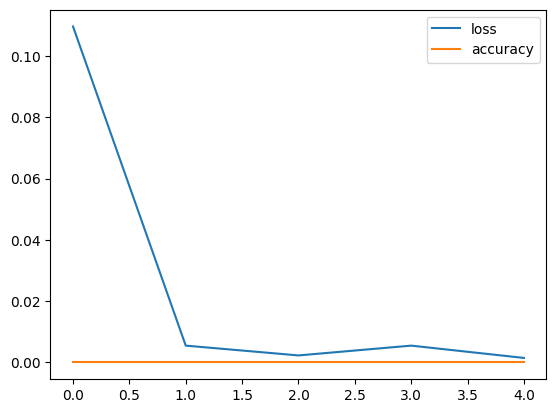

In [158]:
pd.DataFrame(history_1.history).plot()

In [159]:
pred = model_1.predict(x_test)

141/141 [==============================] - 3s 16ms/step


In [166]:
pred_prob = np.argmax(pred,axis=1)
pred_prob

array([0, 0, 0, ..., 0, 0, 0])

In [164]:
lis = []
for x in pred_prob:
  if(x>0.5):
    lis.append(1)
  else:
    lis.append(0)

In [165]:
lis

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
